In [ ]:
#@title CT reconstruction: The Radon Transform Project
#@markdown Github Repository: https://github.com/

#@markdown Team Member Name, PSID, Cougarnet Email
#@markdown 1. Andrew Carranza, 1636927, aecarra2@Cougarnet.uh.edu
#@markdown 2. Joshua Kanagasabai, 1596314, jkangas@cougarnet.uh.edu
#@markdown 3. Dylan Cao, 1844775, dhcao4@cougarnet.uh.edu
#@markdown 4. Lizandro Jesus Meza, 1772231, ljmeza@uh.edu

# yo its coomer#0851 here, just updated this collab to make it more readable; hit me back up in the discord server to polish up
# i was gonna format this to install libraries first, then every code cell will display an intended visual based on the cell's title

In [ ]:
#@title Libraries and Dependencies
#Basic Libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2

#hscikit-image Libraries
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale, rotate,iradon, iradon_sart
from skimage.transform.radon_transform import _get_fourier_filter

#Other Libraries
from scipy.interpolate import RectBivariateSpline

enter degree frequency3


/usr/local/lib/python3.8/dist-packages/skimage/transform/radon_transform.py:83: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


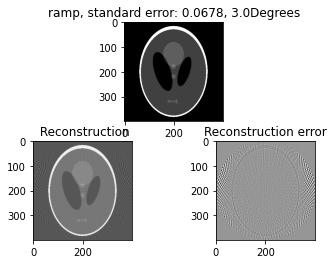

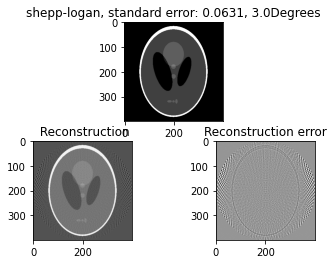

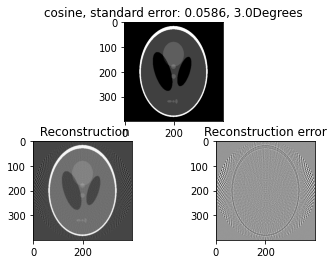

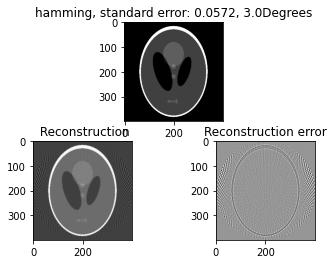

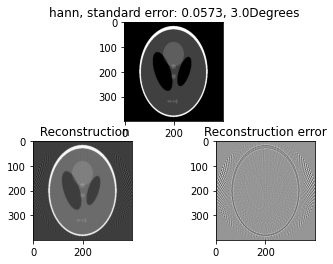

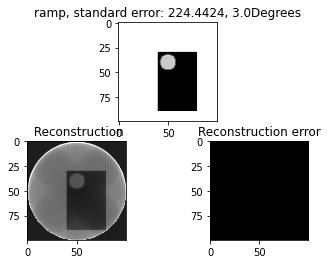

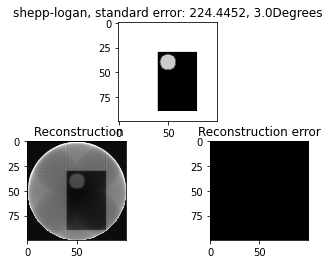

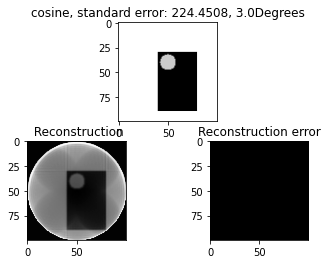

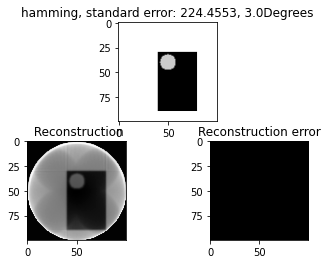

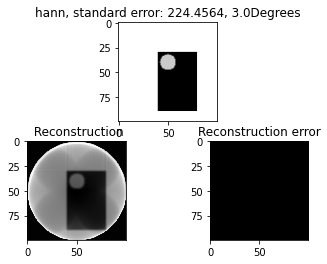

In [ ]:
#@title Reconstruction Filtered Back Projection Technique
import matplotlib.pyplot as plt
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale, rotate,iradon, iradon_sart
import numpy as np

def back_project(phantom,degree,name):
    thetha = np.arange(0, 180., degree)  ##sets angles of rotations
    filter = ['ramp', 'shepp-logan', 'cosine', 'hamming', 'hann']  #list of filter for filterd back projection
    sino = radon(phantom, theta=thetha)  #stores sinogram
    for x in range(len(filter)):                 #loops throught the filters
        reconstruction = iradon(sino, theta=thetha, filter_name=filter[x])
        error = reconstruction - phantom    ##difference between original and back projection
        mse = np.sqrt(np.mean(error**2))
        ms=('%.4f' % mse)
        fig = plt.figure()
        ax0 = plt.subplot(211)
        ax1 = plt.subplot(223)
        ax2 = plt.subplot(224)
        ax0.set_title(filter[x] +', standard error: '+str(ms)+", "+str(degree)+"Degrees")
        ax0.imshow(phantom, cmap=plt.cm.Greys_r)
        ax1.set_title( " Reconstruction")
        ax1.imshow(reconstruction, cmap=plt.cm.Greys_r)
        ax2.set_title("Reconstruction error")
        ax2.imshow(error, vmin=-0.2, vmax=0.2, cmap=plt.cm.Greys_r)
        plt.savefig(name+' filter:' + filter[x] + '.png')

def main():
    degrees=float(input("enter degree frequency"))

   

    locB1 = 30
    locB2 = 40
    lenB1 = 60
    lenB2 = 40
    siB = .2
    siB = siB * 255
    locC1 = 40
    locC2 = 50
    radius = 8
    siC = .75
    siC = siC * 255
    phantom = 255 *  np.ones((100, 100), dtype=np.uint8)  ##create phantom
    for x in range(locB1, locB1 + lenB1):
        for y in range(locB2, locB2 + lenB2):
            phantom[x, y] = siB
    for x in range(locC1 - radius, locC1 + radius):
        for y in range(locC2 - radius, locC2 + radius):
            if (((x - locC1) ** 2) + ((y - locC2) ** 2) <= radius ** 2):
                phantom[x, y] = siC

    back_project(shepp_logan_phantom(),degrees,"shepp_")
    back_project(phantom, degrees,"my_Phantom")
    

if __name__ == "__main__":
    main()

enter degree frequency180
enter the amount of times you want to iterate the phantom image.6


/usr/local/lib/python3.8/dist-packages/skimage/transform/radon_transform.py:83: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


<Figure size 800x600 with 0 Axes>

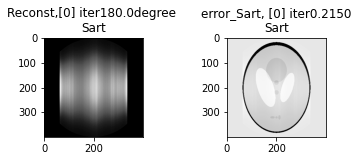

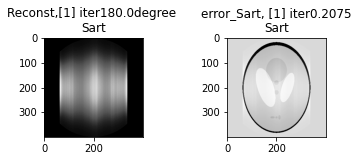

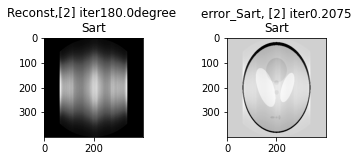

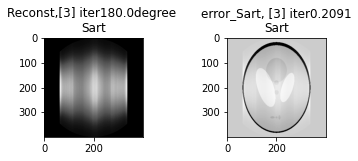

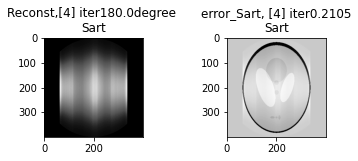

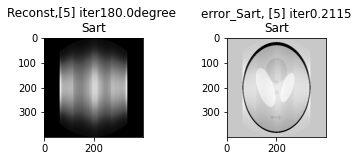

<Figure size 800x600 with 0 Axes>

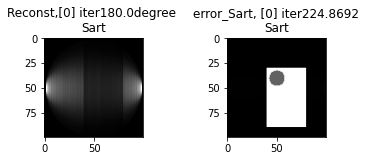

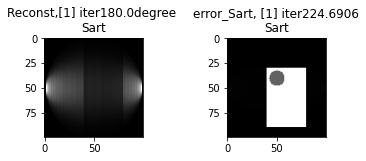

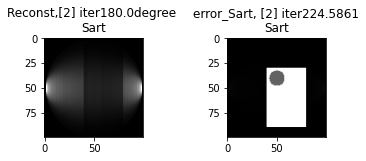

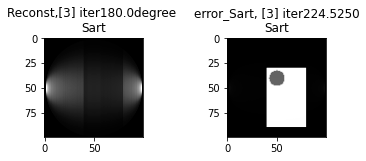

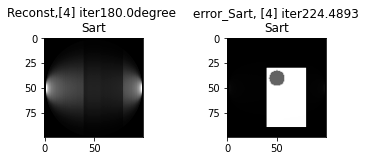

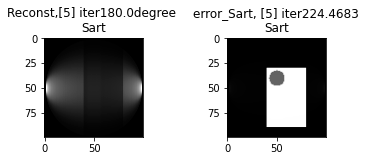

In [ ]:
#@title Reconstruction Simultaneous Algebraic Reconstruction Technique
import matplotlib.pyplot as plt
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale, rotate,iradon, iradon_sart
import numpy as np

def sart_project(phantom,degree,name, iterate):
    # image = phantom
    # image = rescale(image, scale=0.4, mode='reflect')
    thetha = np.arange(0, 180., degree)  ##sets angles of rotations
    
    sino = radon(phantom, theta = thetha )
    reconstruction_sart = iradon_sart(sino, theta=thetha)
    error = reconstruction_sart - phantom
    mse = np.sqrt(np.mean(error**2))
    ms=('%.4f' % mse)


  
    #test
    



    fig = plt.figure(figsize=(8,6), dpi= 100)
    
    # # ax1 = plt.subplot(211)
    # ax1 = plt.subplot(621)
    # ax1.set_title("Reconst Original\nSart")
    # ax1.imshow(reconstruction_sart, cmap=plt.cm.Greys_r)

    # # ax2 = plt.subplot(212)
    # ax2 = plt.subplot(622)
    # ax2.set_title("Reconst_Err Original\nSart")
    # ax2.imshow(reconstruction_sart - phantom, cmap=plt.cm.Greys_r)

    # reconstruction_sart2 = iradon_sart(sino, theta=thetha, image=reconstruction_sart)
    # error2 = reconstruction_sart2 - phantom #subtract Simeltanious Reconstruction technique(SART) from last image.
    # # ax1 = plt.subplot(211)
    # ax5 = plt.subplot(623)
    # ax5.set_title("Reconst Original2\nSart")
    # ax5.imshow(reconstruction_sart2, cmap=plt.cm.Greys_r)

    # # ax2 = plt.subplot(212)
    # ax6 = plt.subplot(624)
    # ax6.set_title("Reconst_Err2 Original\nSart")
    # ax6.imshow(reconstruction_sart2 - phantom, cmap=plt.cm.Greys_r)


    # reconstruction_sart3 = iradon_sart(sino, theta=thetha, image=reconstruction_sart2)
    # error3 = reconstruction_sart3 - phantom
    
    # # ax1 = plt.subplot(211)
    # ax5 = plt.subplot(625)
    # ax5.set_title("Reconst Original3\nSart")
    # ax5.imshow(reconstruction_sart3, cmap=plt.cm.Greys_r)

    # # ax2 = plt.subplot(212)
    # ax6 = plt.subplot(626)
    # ax6.set_title("Reconst_Err3 Original\nSart")
    # ax6.imshow(error3, cmap=plt.cm.Greys_r)


    reconstruction_sart = iradon_sart(sino, theta=thetha) #BASE CASE
    for i in range(iterate):
      
      itterRecon = reconstruction_sart
      #then use previous image to create a new reconstruction of the new image
      reconstruction_sart2 = iradon_sart(sino, theta=thetha, image=itterRecon)
      error2 = reconstruction_sart2 - phantom #subtract Simeltanious Reconstruction technique(SART) from last image.
      mse = np.sqrt(np.mean(error2**2)) #error score 
      ms=('%.4f' % mse)

      fig = plt.figure()
      ax3 = plt.subplot(223)
      ax3.set_title("Reconst," + str([i]) +" iter" + str(degree) + "degree \nSart")
      ax3.imshow(reconstruction_sart2 , cmap=plt.cm.Greys_r)

      ax4 = plt.subplot(224)
      ax4.set_title("error_Sart, " +str([i])+" iter" + str(ms) + "\nSart")
      ax4.imshow(error2, cmap=plt.cm.Greys_r)
      
      #set reconstruction_sart to reconstruction_sart2 
      # and reconstruction_sart2 to Null 
      itterRecon = reconstruction_sart2
      reconstruction_sart2 = iradon_sart(sino, theta=thetha, image = itterRecon)
     
     
      # reconstruction_sart == reconstruction_sart2 # so next iteration has the new image to apply function 
      # reconstruction_sart2 == None

def main():
    degrees=float(input("enter degree frequency"))
    iterate = int(input("enter the amount of times you want to iterate the phantom image."))
    locB1 = 30
    locB2 = 40
    lenB1 = 60
    lenB2 = 40
    siB = .2
    siB = siB * 255
    locC1 = 40
    locC2 = 50
    radius = 8
    siC = .75
    siC = siC * 255
    phantom = 255 * np.ones((100, 100), dtype=np.uint8)  ##create phantom
    for x in range(locB1, locB1 + lenB1):
        for y in range(locB2, locB2 + lenB2):
            phantom[x, y] = siB
    for x in range(locC1 - radius, locC1 + radius):
        for y in range(locC2 - radius, locC2 + radius):
            if (((x - locC1) ** 2) + ((y - locC2) ** 2) <= radius ** 2):
                phantom[x, y] = siC
 
    sart_project(shepp_logan_phantom(), degrees, "my_Phantom", iterate)
    sart_project(phantom, degrees, "my_Phantom", iterate)

    #algebraic reconstruction technique, iterations
    #old image
    thetha = np.arange(0, 180., degrees)  ##sets angles of rotations
    sino = radon(phantom, theta = thetha )
    reconstruction_sart = iradon_sart(sino, theta=thetha)
    error = reconstruction_sart - phantom
    mse = np.sqrt(np.mean(error**2))
    ms=('%.4f' % mse)


if __name__ == "__main__":
    main()

enter degree frequency180


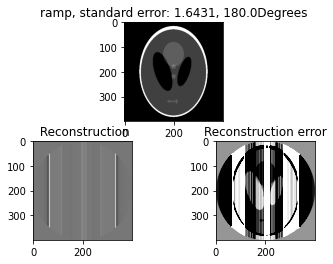

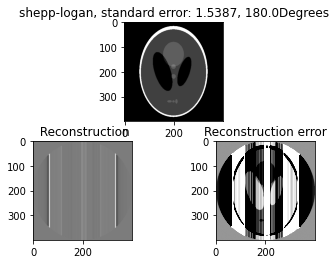

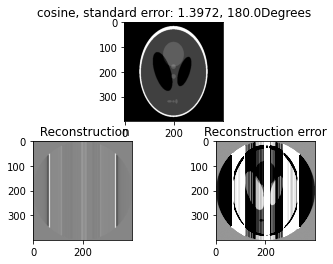

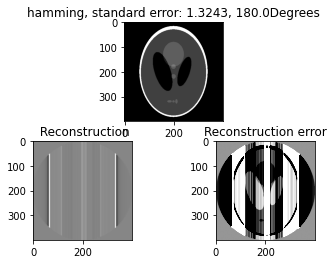

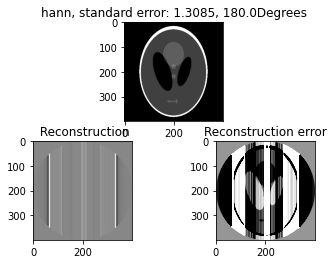

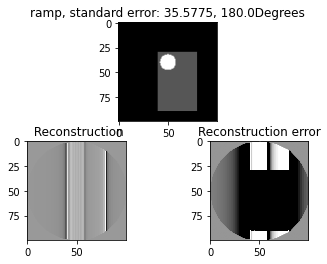

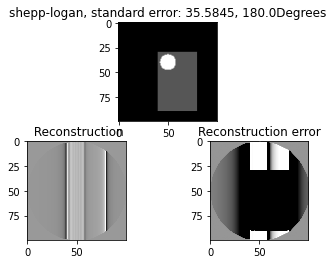

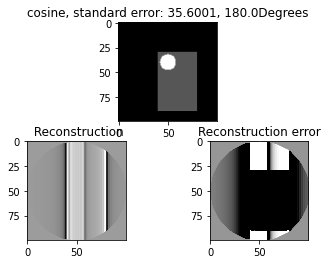

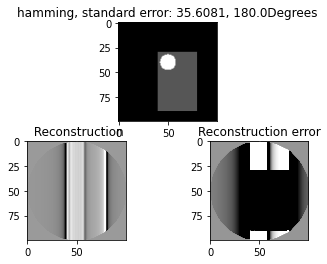

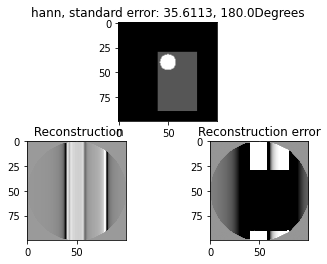

In [ ]:
#@title Filtering and Back Projections
import matplotlib.pyplot as plt
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale, rotate,iradon, iradon_sart
import numpy as np

def back_project(phantom,degree,name):
    thetha = np.arange(0, 180., degree)  ##sets angles of rotations
    filter = ['ramp', 'shepp-logan', 'cosine', 'hamming', 'hann']  #list of filter for filterd back projection
    sino = radon(phantom, theta=thetha)  #stores sinogram

    for x in range(len(filter)):                 #loops throught the filters
        reconstruction = iradon(sino, theta=thetha, filter_name=filter[x])
        error = reconstruction - phantom    ##difference between original and back projection
        mse = np.sqrt(np.mean(error**2))
        ms=('%.4f' % mse)
        fig = plt.figure()
        ax0 = plt.subplot(211)
        ax1 = plt.subplot(223)
        ax2 = plt.subplot(224)
        ax0.set_title(filter[x] +', standard error: '+str(ms)+", "+str(degree)+"Degrees")
        ax0.imshow(phantom, cmap=plt.cm.Greys_r)
        ax1.set_title( " Reconstruction")
        ax1.imshow(reconstruction, cmap=plt.cm.Greys_r)
        ax2.set_title("Reconstruction error")
        ax2.imshow(error, vmin=-0.2, vmax=0.2, cmap=plt.cm.Greys_r)
        plt.savefig(name+' filter:' + filter[x] + '.png')

def main():
    degrees=float(input("enter degree frequency"))

    locB1 = 30
    locB2 = 40
    lenB1 = 60
    lenB2 = 40
    siB = .2
    siB = siB * 255
    locC1 = 40
    locC2 = 50
    radius = 8
    siC = .75
    siC = siC * 255
    phantom = np.zeros((100, 100), dtype=np.uint8)  ##create phantom

    for x in range(locB1, locB1 + lenB1):
        for y in range(locB2, locB2 + lenB2):
            phantom[x, y] = siB
    for x in range(locC1 - radius, locC1 + radius):
        for y in range(locC2 - radius, locC2 + radius):
            if (((x - locC1) ** 2) + ((y - locC2) ** 2) <= radius ** 2):
                phantom[x, y] = siC

    back_project(shepp_logan_phantom(),degrees,"shepp_")
    back_project(phantom, degrees,"my_Phantom")

if __name__ == "__main__":
    main()

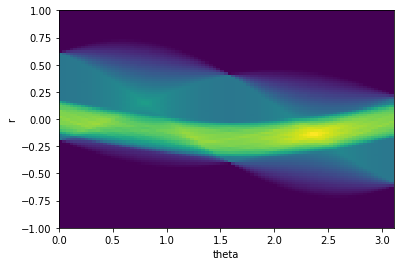

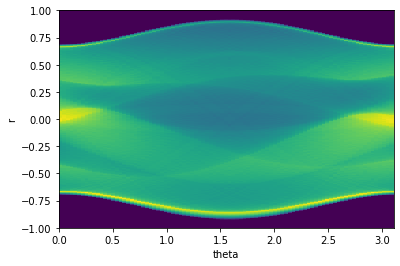

In [ ]:
#@title Sinogram Display

import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale, rotate
import cv2
import numpy as np

def sinogram(phantom):

    lnrange = np.linspace(-1, 1, phantom.shape[0])
    xValue, yValue = np.meshgrid(lnrange, lnrange)
    thetha = np.arange(0, 180., 2) * np.pi / 180  ##sets angles of rotations
    dr = np.diff(lnrange)[0]
    rot = np.array([rotate(phantom, theta * 180 / np.pi) for theta in thetha])
    p = np.array([x.sum(axis=0) * dr for x in rot]).T
    plt.pcolor(thetha, lnrange, p)
    plt.xlabel('theta')
    plt.ylabel('r')
    plt.show()

locB1 = 30
locB2 = 40
lenB1 = 40
lenB2 = 40
siB = .2
siB = siB * 255
locC1 = 40
locC2 = 50
radius = 8
siC = .75
siC = siC * 255
phantom =np.zeros((100,100),dtype=np.uint8)             ##create phantom
for x in range(locB1, locB1 + lenB1):
    for y in range(locB2, locB2 + lenB2):
        phantom[x, y] = siB
for x in range(locC1 - radius, locC1 + radius):
    for y in range(locC2 - radius, locC2 + radius):
        if (((x - locC1) ** 2) + ((y - locC2) ** 2) <= radius ** 2):
                phantom[x, y] = siC
sinogram(phantom)
   
sinogram(shepp_logan_phantom()) 

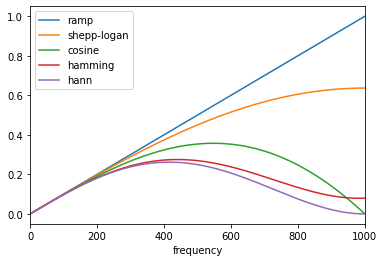

In [ ]:
#@title Fourier Filter Graph

import matplotlib.pyplot as plt
from skimage.transform.radon_transform import _get_fourier_filter

filters = ['ramp', 'shepp-logan', 'cosine', 'hamming', 'hann']

for ix, f in enumerate(filters):
    response = _get_fourier_filter(2000, f)
    plt.plot(response, label=f)

plt.xlim([0, 1000])
plt.xlabel('frequency')
plt.legend()
plt.show()